In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from Utils_2 import *
from linUCB_1 import *
import seaborn as sns

In [2]:
dataExt3 = pd.read_csv('DataExtra/game3.csv')
dataExt3["NGU"] = (dataExt3.ab_test_datetime_start == dataExt3.register_date_alias) * 1

dataExt2 = pd.read_csv('DataExtra/game1.csv')
dataExt2["NGU"] = (dataExt2.ab_test_datetime_start == dataExt2.register_date_alias) * 1

In [3]:
Features_ALL = ["ab_test_id", "ab_test_experience_id", "country_alias", "platform_alias", "source_alias", "NGU",
            "return_d1", "converted_d1", "ad_revenue_d1", "time_played_d1", "num_sessions_d1", "num_impressions_d1", "num_transactions_d1", "iap_revenue_d1",
            "return_d3", "converted_d3", "ad_revenue_d3", "time_played_d3", "num_sessions_d3", "num_impressions_d3", "num_transactions_d3", "iap_revenue_d3", 
            "return_d7", "converted_d7", "ad_revenue_d7", "time_played_d7", "num_sessions_d7", "num_impressions_7", "num_transactions_d7", "iap_revenue_d7"]

data_big2 = dataExt2[Features_ALL].copy()
data_big3 = dataExt3[Features_ALL].copy()
print("\nDataExtra3 different A/B tests counts:")
print(data_big3.ab_test_id.value_counts())
print("\nDataExtra2 different A/B tests counts:")
print(data_big2.ab_test_id.value_counts())


DataExtra3 different A/B tests counts:
3350    1381702
3301     776402
3331     717633
3292     706119
3346     655856
3307     413295
Name: ab_test_id, dtype: int64

DataExtra2 different A/B tests counts:
3495    486295
3552    458911
3582    301515
3473    285731
3457    247844
3454    245962
3565    225935
3420    184148
3507    163803
3526    159849
Name: ab_test_id, dtype: int64


In [4]:
Test_ID_big = 3301
Test_ID_big2 = 3582
NGU = 1
DataDef = data_big3[(data_big3.ab_test_id == Test_ID_big) & (data_big3.NGU == NGU)]
DataDef2 = data_big2[(data_big2.ab_test_id == Test_ID_big2) & (data_big2.NGU == NGU)]
print("2 Arms data shape:", DataDef.shape)
print("4 Arms data shape:", DataDef2.shape)

Features_Dummie = ["country_alias", "platform_alias", "source_alias"]
DataDef_cat = CreateDummies(DataDef, Features_Dummie)
DataDef_cat2 = CreateDummies(DataDef2, Features_Dummie)

2 Arms data shape: (743103, 30)
4 Arms data shape: (289806, 30)


In [5]:
Actual_Dataset = DataDef_cat.sample(n=70000, random_state=32)
Actual_Dataset2 = DataDef_cat2.sample(n=140000, random_state=31)

In [6]:
print(np.mean(DataDef["iap_revenue_d1"]))
print(np.mean(Actual_Dataset["iap_revenue_d1"]))
print("")
print(DataDef["iap_revenue_d1"].value_counts(normalize=True).sort_index()[0])
print(Actual_Dataset["iap_revenue_d1"].value_counts(normalize=True).sort_index()[0])

print("==========================================")
print(np.mean(DataDef2["iap_revenue_d1"]))
print(np.mean(Actual_Dataset2["iap_revenue_d1"]))
print("")
print(DataDef2["iap_revenue_d1"].value_counts(normalize=True).sort_index()[0])
print(Actual_Dataset2["iap_revenue_d1"].value_counts(normalize=True).sort_index()[0])



0.4503352421534146
0.48950966627557085

0.9912488578299374
0.9909857142857142
0.018807756020341345
0.01798449726936217

0.9986025134055195
0.9985428571428572


# IAP metric as reward

### 2 Arms experiment

#### Day 1

In [56]:
Reward = "iap_revenue_d1"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results1, Paths_Best1, Aligns_Best1, Mean_Reward_Best1, Mean_RewardArms_Best1, Mark_Best1, Feat_Best1, Times_ArmChosen1 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

Score to beat: 0.48950966627557085
Parameters for following model:
	Reward: iap_revenue_d1
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 6 

EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [01:14<00:00, 941.08it/s]


	Algorithm result is: 0.5667173102949752
	Score to beat is: 0.48950966627557085
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [01:14<00:00, 936.06it/s]


	Algorithm result is: 0.5250289443254433
	Score to beat is: 0.48950966627557085
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [01:12<00:00, 961.96it/s]


	Algorithm result is: 0.432016494665563
	Score to beat is: 0.48950966627557085
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [01:14<00:00, 940.49it/s]


	Algorithm result is: 0.5077970885655908
	Score to beat is: 0.48950966627557085
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [01:13<00:00, 957.15it/s]


	Algorithm result is: 0.5042936069668279
	Score to beat is: 0.48950966627557085
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [01:13<00:00, 956.23it/s]


	Algorithm result is: 0.49297393027655223
	Score to beat is: 0.48950966627557085
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 3


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [01:12<00:00, 969.02it/s]


	Algorithm result is: 0.4801540211767996
	Score to beat is: 0.48950966627557085
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [01:12<00:00, 964.58it/s]


	Algorithm result is: 0.43828633848046605
	Score to beat is: 0.48950966627557085


In [57]:
Results1

[0.5667173102949752,
 0.5250289443254433,
 0.432016494665563,
 0.5077970885655908,
 0.5042936069668279,
 0.49297393027655223,
 0.4801540211767996,
 0.43828633848046605]

In [58]:
print("Best alpha is:", Alphas[Results1.index(np.max(Results1))])
Alpha = Alphas[Results1.index(np.max(Results1))]

Best alpha is: 0.5


In [59]:
Mean_Reward_Best1

[0.5784795312489835,
 0.5243144018849478,
 0.7809730177169107,
 0.4566046848301195,
 0.4932149157939145]

In [62]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))
print("")
print(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward].value_counts(normalize=True)[0])
print(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward].value_counts(normalize=True)[0])

0.5131602664674701
0.46566501405237226

0.991008166633469
0.9909630777175317


In [63]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best1))

Score to beat: 0.48950966627557085
Algorithm score: 0.5667173102949752


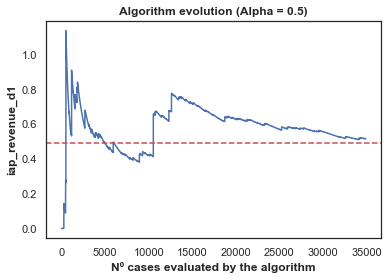

In [76]:
Plot_AlignRewards(Aligns_Best1, 0, Reward, Alpha, N = 70000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

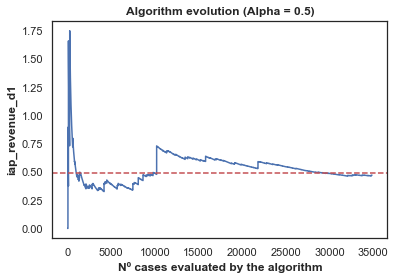

In [77]:
Plot_AlignRewards(Aligns_Best1, 1, Reward, Alpha, N = 70000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

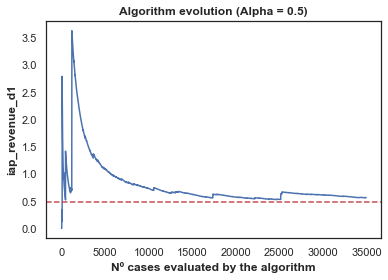

In [78]:
Plot_AlignRewards(Aligns_Best1, 2, Reward, Alpha, N = 70000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

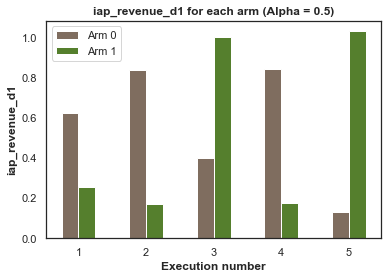

In [79]:
PerformanceArm2(Mean_RewardArms_Best1, Alpha, Reward)

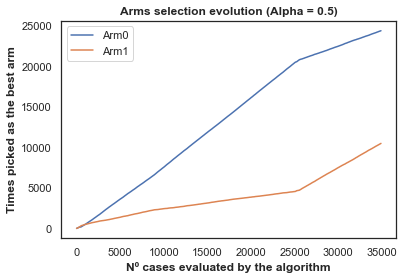

In [80]:
Plot_ArmsSelection(Paths_Best1, 0, Alpha)

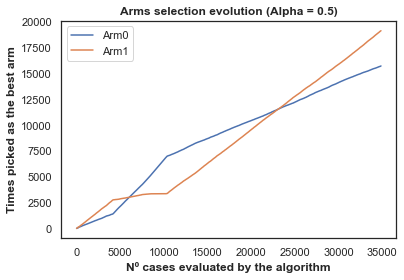

In [81]:
Plot_ArmsSelection(Paths_Best1, 1, Alpha)

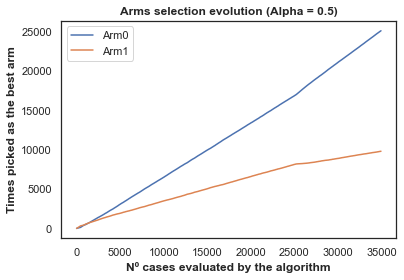

In [82]:
Plot_ArmsSelection(Paths_Best1, 2, Alpha)

Times each arm is chosen: [20298.  14664.6]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 18.393336276788578
Proportion source_alias_source2 equals 0 for arm 1 is: 36.91395488755035


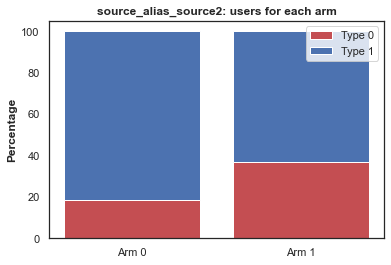

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 72.16490314866881
Proportion platform_alias_platform2 equals 0 for arm 1 is: 71.23773175587897


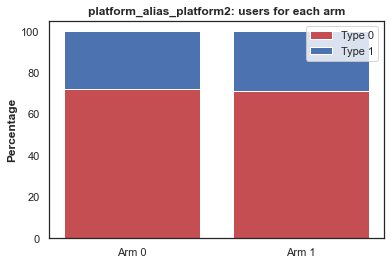

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.32220108 0.15798461 0.51981431]
Proportion country for arm 1 is: [0.33427628 0.14264366 0.52308006]


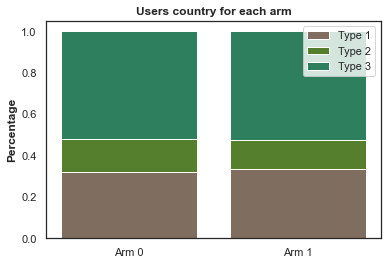

In [83]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen1, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best1, Feat_Best1)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best1, Feat_Best1)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best1, Feat_Best1)

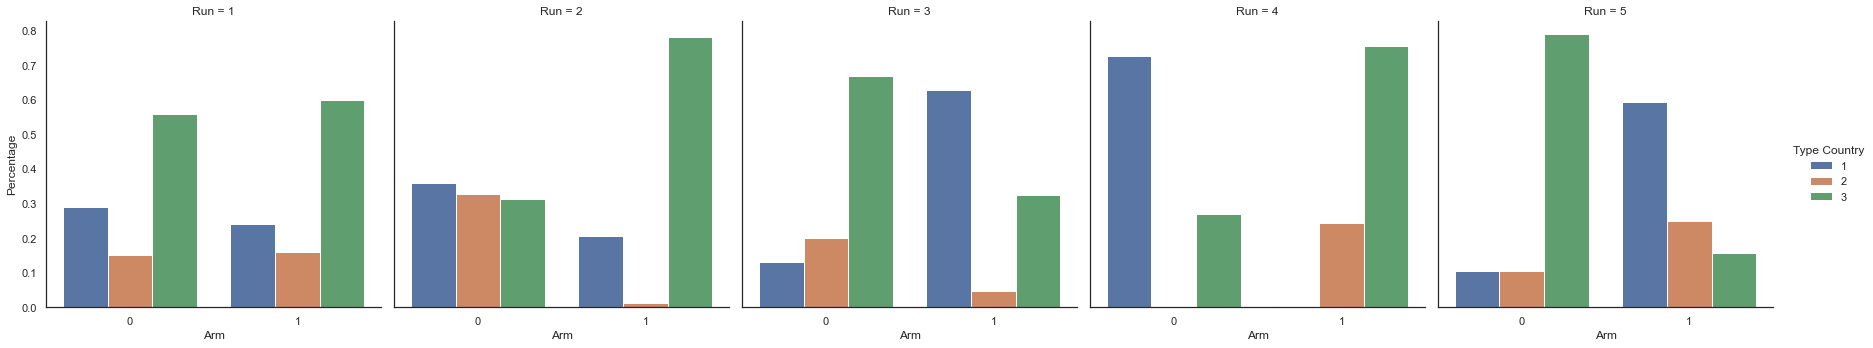

In [87]:
Country_5Runs(Feat_Best1)

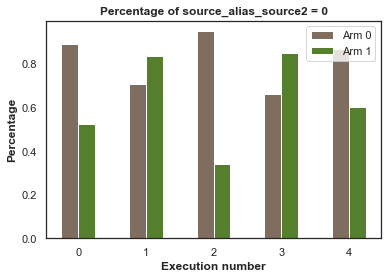

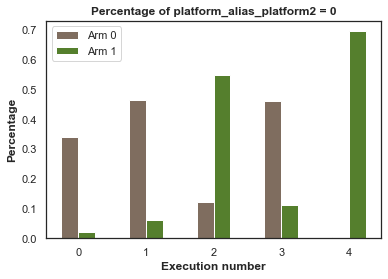

In [88]:
PlotFeaturesArm_2(Feat_Best1, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best1, Alpha, Reward = "platform_alias_platform2")

#### Day 3

In [7]:
Reward = "iap_revenue_d3"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3.5]
Times = 5

Results3, Paths_Best3, Aligns_Best3, Mean_Reward_Best3, Mean_RewardArms_Best3, Mark_Best3, Feat_Best3, Times_ArmChosen3 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

Score to beat: 0.8620067968984675
Parameters for following model:
	Reward: iap_revenue_d3
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d3 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:35<00:00, 451.57it/s]


	Algorithm result is: 0.7038466801378084
	Score to beat is: 0.8620067968984675
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d3 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:18<00:00, 506.26it/s]


	Algorithm result is: 0.8684445161067822
	Score to beat is: 0.8620067968984675
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d3 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:19<00:00, 501.81it/s]


	Algorithm result is: 0.9521496292804231
	Score to beat is: 0.8620067968984675
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d3 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:18<00:00, 505.09it/s]


	Algorithm result is: 1.2227986285912205
	Score to beat is: 0.8620067968984675
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d3 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:12<00:00, 529.35it/s]


	Algorithm result is: 0.8189633072891693
	Score to beat is: 0.8620067968984675
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d3 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:41<00:00, 434.69it/s]


	Algorithm result is: 0.7232436372552835
	Score to beat is: 0.8620067968984675
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d3 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:46<00:00, 421.38it/s]

	Algorithm result is: 0.8579957399238328
	Score to beat is: 0.8620067968984675


In [8]:
Results3

[0.7038466801378084,
 0.8684445161067822,
 0.9521496292804231,
 1.2227986285912205,
 0.8189633072891693,
 0.7232436372552835,
 0.8579957399238328]

In [9]:
print("Best alpha is:", Alphas[Results3.index(np.max(Results3))])
Alpha = Alphas[Results3.index(np.max(Results3))]

Best alpha is: 2


In [11]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

1.0775683088848809
0.6446766131265262


In [12]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best3))

Score to beat: 0.8620067968984675
Algorithm score: 1.2227986285912205


In [13]:
Mean_Reward_Best3

[0.7920407092770552,
 2.6064020924831364,
 1.0168430957348984,
 0.9269577543660991,
 0.771749491094912]

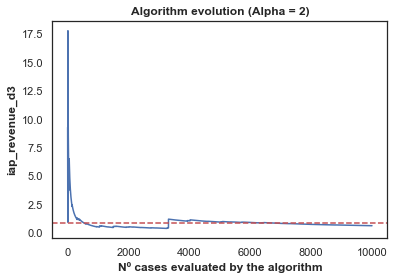

In [29]:
Plot_AlignRewards(Aligns_Best3, 0, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

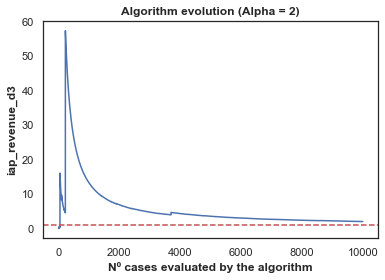

In [22]:
Plot_AlignRewards(Aligns_Best3, 1, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

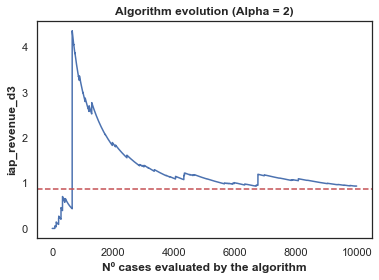

In [31]:
Plot_AlignRewards(Aligns_Best3, 3, Reward, Alpha, N = 10000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

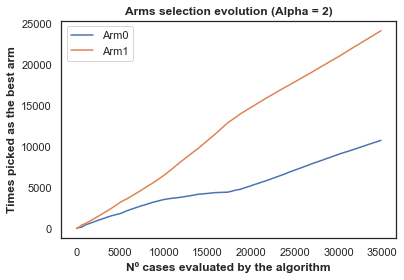

In [25]:
Plot_ArmsSelection(Paths_Best3, 0, Alpha)

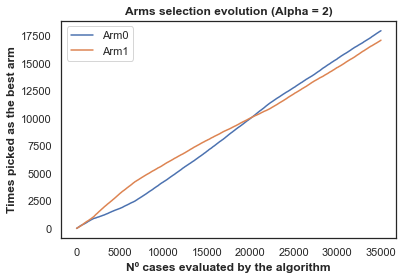

In [32]:
Plot_ArmsSelection(Paths_Best3, 3, Alpha)

Times each arm is chosen: [10970.4 23824.6]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 24.791499821253645
Proportion source_alias_source2 equals 0 for arm 1 is: 19.497540672316667


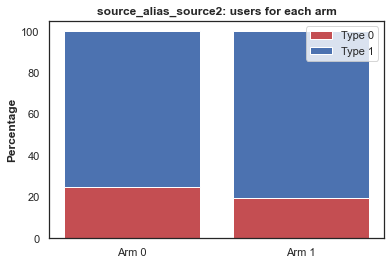

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 58.15461489504703
Proportion platform_alias_platform2 equals 0 for arm 1 is: 84.21775373617258


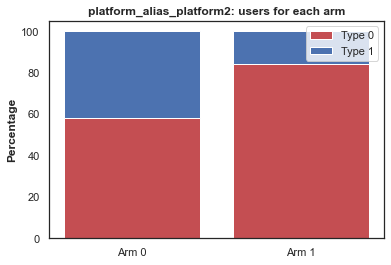

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.30113387 0.14440781 0.55445832]
Proportion country for arm 1 is: [0.22596054 0.14379262 0.63024684]


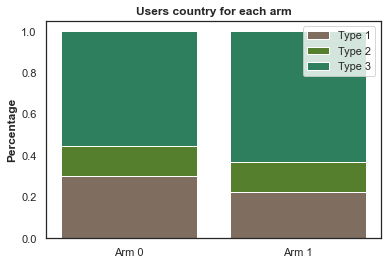

In [33]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen3, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best3, Feat_Best3)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best3, Feat_Best3)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best3, Feat_Best3)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 69.88661306422577
Proportion country_alias_country_group1 equals 0 for arm 1 is: 77.40394645314481

Proportion country_alias_country_group2 equals 0 for arm 0 is: 85.55921942373976
Proportion country_alias_country_group2 equals 0 for arm 1 is: 85.62073781817017

Proportion country_alias_country_group3 equals 0 for arm 0 is: 44.554167512034475
Proportion country_alias_country_group3 equals 0 for arm 1 is: 36.97531572868503

Proportion platform_alias_platform2 equals 0 for arm 0 is: 58.15461489504703
Proportion platform_alias_platform2 equals 0 for arm 1 is: 84.21775373617258

Proportion source_alias_source2 equals 0 for arm 0 is: 24.791499821253645
Proportion source_alias_source2 equals 0 for arm 1 is: 19.497540672316667

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 39.94555736745785
Proportion return_d1 equals 0 for arm 1 is: 63.52887818

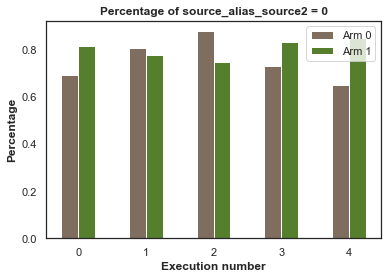

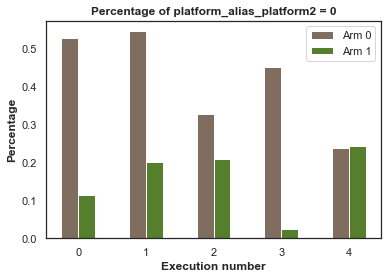

In [35]:
printFeatures2(Mark_Best3, Feat_Best3, Features)
PlotFeaturesArm_2(Feat_Best3, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best3, Alpha, Reward = "platform_alias_platform2")

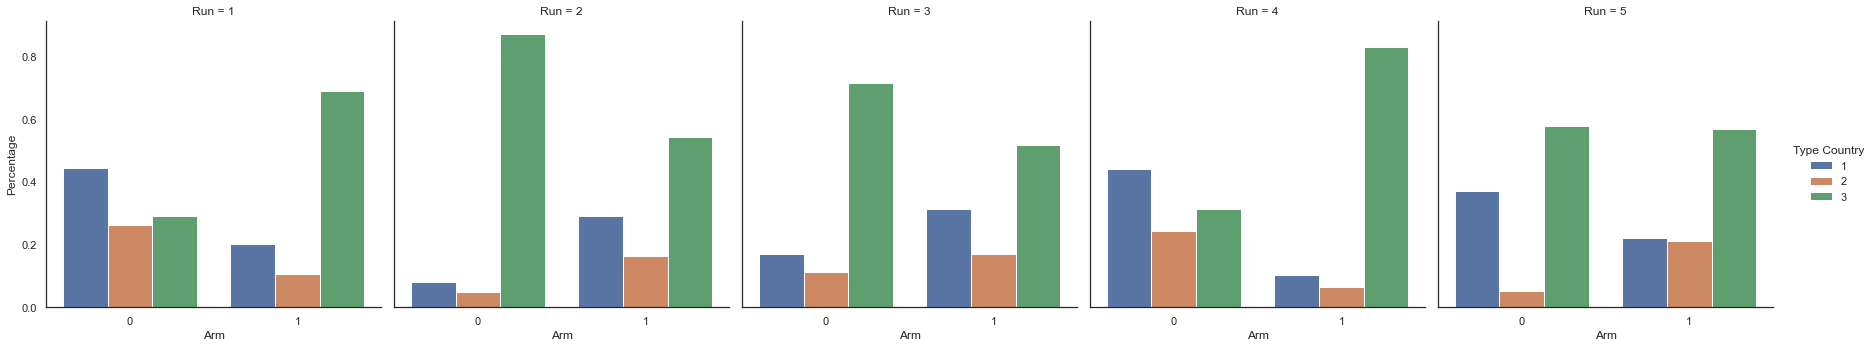

In [37]:
Country_5Runs(Feat_Best3)

#### Day 7

In [38]:
Reward = "iap_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1",
            "return_d3", "time_played_d3", "ad_revenue_d3", "iap_revenue_d3", "num_sessions_d3"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results7, Paths_Best7, Aligns_Best7, Mean_Reward_Best7, Mean_RewardArms_Best7, Mark_Best7, Feat_Best7, Times_ArmChosen7 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

Score to beat: 1.183271546587609
Parameters for following model:
	Reward: iap_revenue_d7
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 16 

EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [03:51<00:00, 302.06it/s]


	Algorithm result is: 1.2248275770613555
	Score to beat is: 1.183271546587609
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [03:44<00:00, 311.55it/s]


	Algorithm result is: 1.0696040129220616
	Score to beat is: 1.183271546587609
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [03:42<00:00, 314.91it/s]


	Algorithm result is: 1.2926170053430166
	Score to beat is: 1.183271546587609
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [03:47<00:00, 307.97it/s]


	Algorithm result is: 1.1017933178513772
	Score to beat is: 1.183271546587609
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [04:06<00:00, 283.48it/s]


	Algorithm result is: 1.3760081820412835
	Score to beat is: 1.183271546587609
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [03:49<00:00, 304.83it/s]


	Algorithm result is: 1.2900559770387598
	Score to beat is: 1.183271546587609
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 3


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [03:54<00:00, 298.29it/s]


	Algorithm result is: 1.1810451239056385
	Score to beat is: 1.183271546587609
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [03:42<00:00, 314.61it/s]

	Algorithm result is: 1.0134285493657393
	Score to beat is: 1.183271546587609


In [39]:
Results7

[1.2248275770613555,
 1.0696040129220616,
 1.2926170053430166,
 1.1017933178513772,
 1.3760081820412835,
 1.2900559770387598,
 1.1810451239056385,
 1.0134285493657393]

In [40]:
print("Best alpha is:", Alphas[Results7.index(np.max(Results7))])
Alpha = Alphas[Results7.index(np.max(Results7))]

Best alpha is: 2.3581015157406195


In [41]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

1.5123801051617989
0.8514626681995497


In [42]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7))

Score to beat: 1.183271546587609
Algorithm score: 1.3760081820412835


In [43]:
Mean_Reward_Best7

[1.8146878129375055,
 0.9567741455716773,
 1.5908696208672457,
 0.9189101913759429,
 1.598799139454045]

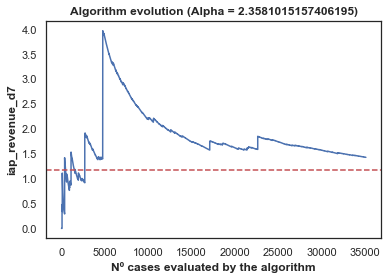

In [47]:
Plot_AlignRewards(Aligns_Best7, 0, Reward, Alpha, N = 50000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

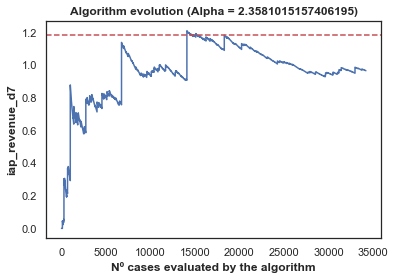

In [48]:
Plot_AlignRewards(Aligns_Best7, 1, Reward, Alpha, N = 50000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

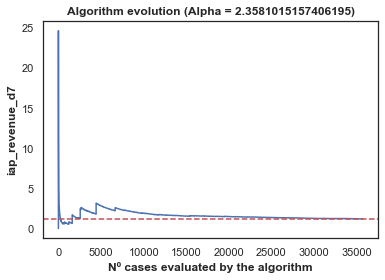

In [53]:
Plot_AlignRewards(Aligns_Best7, 2, Reward, Alpha, N = 60000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

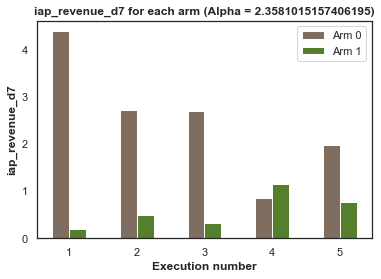

In [54]:
PerformanceArm2(Mean_RewardArms_Best7, Alpha, Reward)

In [55]:
Times_ArmChosen7

[[10235, 24862], [7176, 27040], [13052, 22658], [24681, 10388], [20570, 14384]]

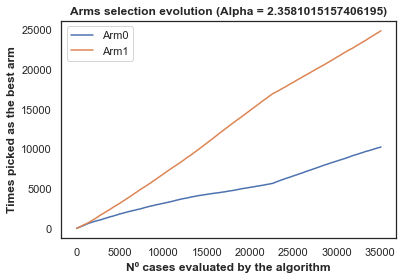

In [57]:
Plot_ArmsSelection(Paths_Best7, 0, Alpha)

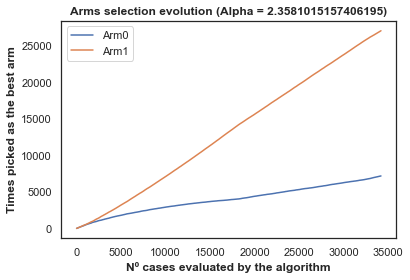

In [58]:
Plot_ArmsSelection(Paths_Best7, 1, Alpha)

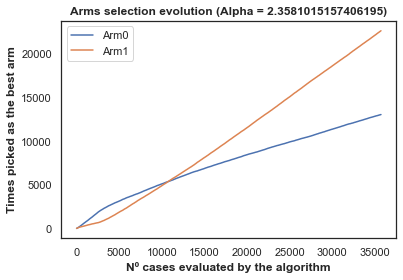

In [59]:
Plot_ArmsSelection(Paths_Best7, 2, Alpha)

Times each arm is chosen: [15142.8 19866.4]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 21.575331074068355
Proportion source_alias_source2 equals 0 for arm 1 is: 24.899538629752325


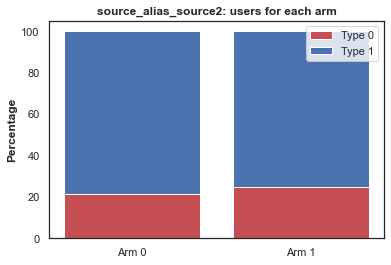

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 66.98676709452486
Proportion platform_alias_platform2 equals 0 for arm 1 is: 75.6176386046411


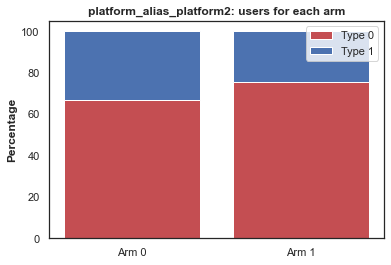

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.24426038 0.24734946 0.50839016]
Proportion country for arm 1 is: [0.35474148 0.13750823 0.5077503 ]


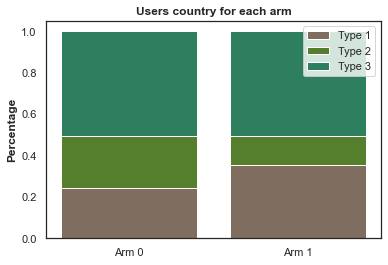

In [60]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7, Feat_Best7)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7, Feat_Best7)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7, Feat_Best7)

In [61]:
printFeatures2(Mark_Best7, Feat_Best7, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 75.5739615097636
Proportion country_alias_country_group1 equals 0 for arm 1 is: 64.52585235001281

Proportion country_alias_country_group2 equals 0 for arm 0 is: 75.26505447824509
Proportion country_alias_country_group2 equals 0 for arm 1 is: 86.2491774198325

Proportion country_alias_country_group3 equals 0 for arm 0 is: 49.16098401199128
Proportion country_alias_country_group3 equals 0 for arm 1 is: 49.22497023015465

Proportion platform_alias_platform2 equals 0 for arm 0 is: 66.98676709452486
Proportion platform_alias_platform2 equals 0 for arm 1 is: 75.6176386046411

Proportion source_alias_source2 equals 0 for arm 0 is: 21.575331074068355
Proportion source_alias_source2 equals 0 for arm 1 is: 24.899538629752325

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 45.970240478023484
Proportion return_d1 equals 0 for arm 1 is: 58.14990670837

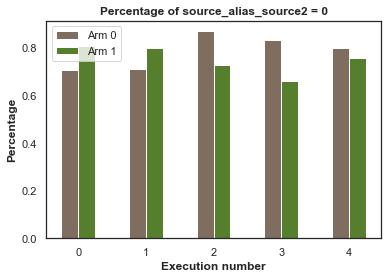

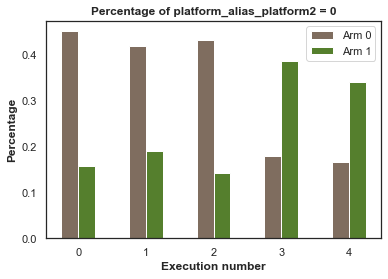

In [62]:
PlotFeaturesArm_2(Feat_Best7, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best7, Alpha, Reward = "platform_alias_platform2")

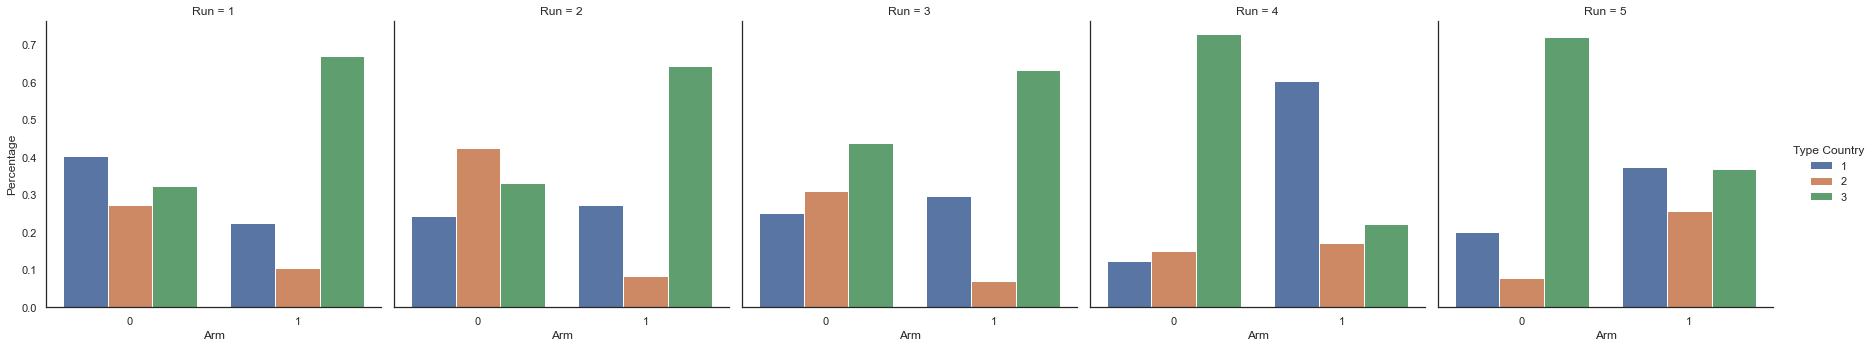

In [63]:
Country_5Runs(Feat_Best7)

#### Test removing features

In [64]:
Reward = "iap_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results7_aux2, Paths_Best7_aux2, Aligns_Best7_aux2, Mean_Reward_Best7_aux2, Mean_RewardArms_Best7_aux2, Mark_Best7_aux2, Feat_Best7_aux2, Times_ArmChosen7_aux2 = ExperimentAlphas(Actual_Dataset, Reward, Features, Alphas, Times)

Score to beat: 1.183271546587609
Parameters for following model:
	Reward: iap_revenue_d7
	Number of Arms: 2
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 0.5


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:25<00:00, 482.15it/s]


	Algorithm result is: 0.9241579128120773
	Score to beat is: 1.183271546587609
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 1


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:22<00:00, 490.83it/s]


	Algorithm result is: 1.0911402088541338
	Score to beat is: 1.183271546587609
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 1.5


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:49<00:00, 413.96it/s]


	Algorithm result is: 0.9261672614099187
	Score to beat is: 1.183271546587609
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 2


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:33<00:00, 457.37it/s]


	Algorithm result is: 1.7056533991673284
	Score to beat is: 1.183271546587609
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 2.3581015157406195


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:22<00:00, 491.91it/s]


	Algorithm result is: 1.0989166932855592
	Score to beat is: 1.183271546587609
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 2.480207187300798


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:24<00:00, 484.93it/s]


	Algorithm result is: 1.07921927499723
	Score to beat is: 1.183271546587609
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 3


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:31<00:00, 461.13it/s]


	Algorithm result is: 1.211405029691349
	Score to beat is: 1.183271546587609
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 3.5


100%|███████████████████████████████████████████████████████████████████████████| 70000/70000 [02:31<00:00, 461.07it/s]

	Algorithm result is: 1.1120688114103887
	Score to beat is: 1.183271546587609


In [65]:
Results7_aux2

[0.9241579128120773,
 1.0911402088541338,
 0.9261672614099187,
 1.7056533991673284,
 1.0989166932855592,
 1.07921927499723,
 1.211405029691349,
 1.1120688114103887]

In [66]:
print("Best alpha is:", Alphas[Results7_aux2.index(np.max(Results7_aux2))])
Alpha = Alphas[Results7_aux2.index(np.max(Results7_aux2))]

Best alpha is: 2


In [67]:
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset[Actual_Dataset["ab_test_experience_id"]==1][Reward]))

1.5123801051617989
0.8514626681995497


In [68]:
print("Score to beat:", np.mean(Actual_Dataset[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7_aux2))

Score to beat: 1.183271546587609
Algorithm score: 1.7056533991673284


In [69]:
Mean_Reward_Best7_aux2

[1.8874701384028485,
 1.4536484110499808,
 2.04444791767153,
 2.0831518621290037,
 1.059548666583278]

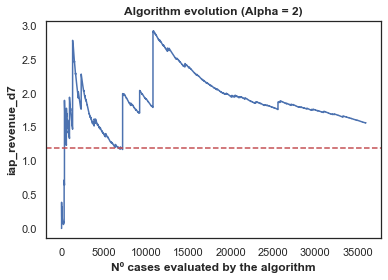

In [70]:
Plot_AlignRewards(Aligns_Best7_aux2, 0, Reward, Alpha, N = 50000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

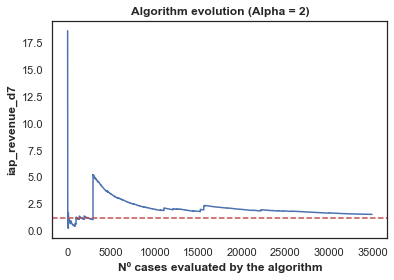

In [71]:
Plot_AlignRewards(Aligns_Best7_aux2, 2, Reward, Alpha, N = 50000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

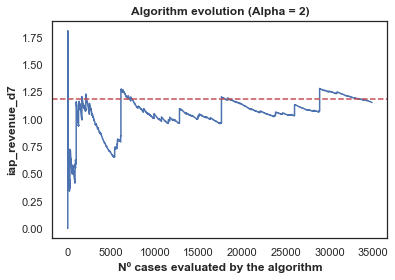

In [72]:
Plot_AlignRewards(Aligns_Best7_aux2, 4, Reward, Alpha, N = 60000)
plt.axhline(y=np.mean(Actual_Dataset[Reward]), color='r', linestyle='--')

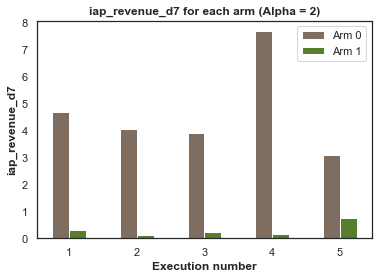

In [73]:
PerformanceArm2(Mean_RewardArms_Best7_aux2, Alpha, Reward)

In [74]:
Times_ArmChosen7_aux2

[[10326, 25668], [12714, 22340], [12420, 22542], [5387, 28984], [5967, 28890]]

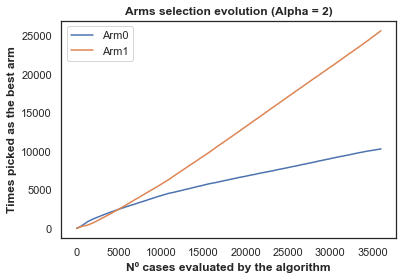

In [75]:
Plot_ArmsSelection(Paths_Best7_aux2, 0, Alpha)

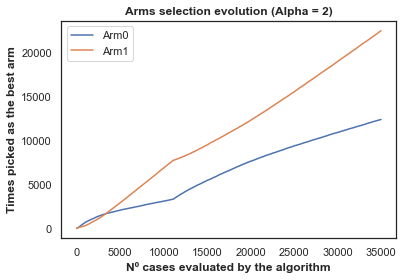

In [76]:
Plot_ArmsSelection(Paths_Best7_aux2, 2, Alpha)

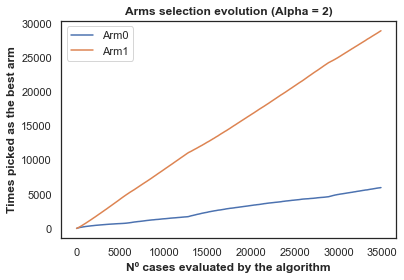

In [77]:
Plot_ArmsSelection(Paths_Best7_aux2, 4, Alpha)

Times each arm is chosen: [ 9362.8 25684.8]

Feature distribution:
source2    0.778379
source1    0.221621
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 24.73394590368272
Proportion source_alias_source2 equals 0 for arm 1 is: 22.05751587317351


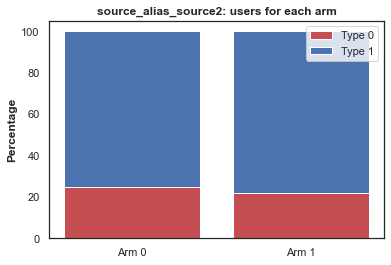

Feature distribution:
platform1    0.756006
platform2    0.243994
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 58.902362945641705
Proportion platform_alias_platform2 equals 0 for arm 1 is: 81.88936771893313


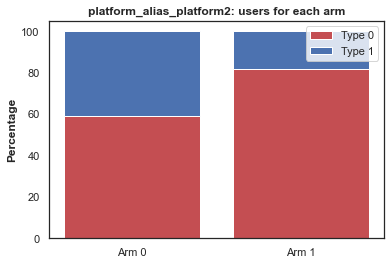

Feature distribution:
country_group3    0.569864
country_group1    0.275269
country_group2    0.154867
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.2180363  0.24605254 0.53591115]
Proportion country for arm 1 is: [0.29334638 0.12461135 0.58204227]


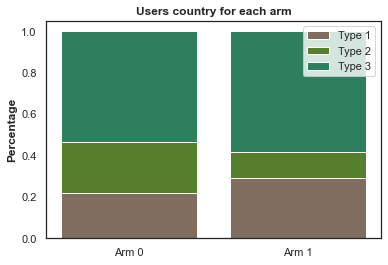

In [78]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7_aux2, axis = 0))
print("")
print("Feature distribution:")
print(DataDef["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7_aux2, Feat_Best7_aux2)
print("Feature distribution:")
print(DataDef["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7_aux2, Feat_Best7_aux2)
print("Feature distribution:")
print(DataDef["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7_aux2, Feat_Best7_aux2)

In [79]:
printFeatures2(Mark_Best7_aux2, Feat_Best7_aux2, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 78.19636975232878
Proportion country_alias_country_group1 equals 0 for arm 1 is: 70.66536237208682

Proportion country_alias_country_group2 equals 0 for arm 0 is: 75.39474553550663
Proportion country_alias_country_group2 equals 0 for arm 1 is: 87.53886509764295

Proportion country_alias_country_group3 equals 0 for arm 0 is: 46.4088847121646
Proportion country_alias_country_group3 equals 0 for arm 1 is: 41.7957725302702

Proportion platform_alias_platform2 equals 0 for arm 0 is: 58.902362945641705
Proportion platform_alias_platform2 equals 0 for arm 1 is: 81.88936771893313

Proportion source_alias_source2 equals 0 for arm 0 is: 24.73394590368272
Proportion source_alias_source2 equals 0 for arm 1 is: 22.05751587317351

Proportion NGU equals 0 for arm 0 is: 100.0
Proportion NGU equals 0 for arm 1 is: 100.0

Proportion return_d1 equals 0 for arm 0 is: 30.569579401903617
Proportion return_d1 equals 0 for arm 1 is: 65.15453808879

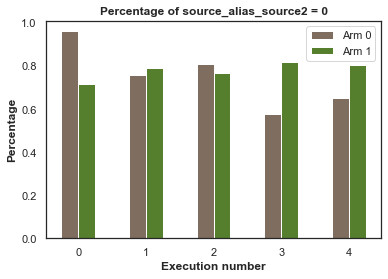

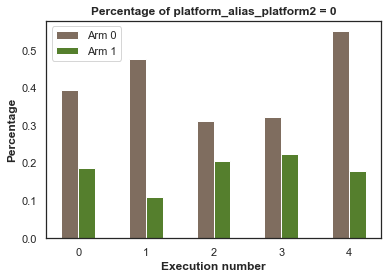

In [80]:
PlotFeaturesArm_2(Feat_Best7_aux2, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_2(Feat_Best7_aux2, Alpha, Reward = "platform_alias_platform2")

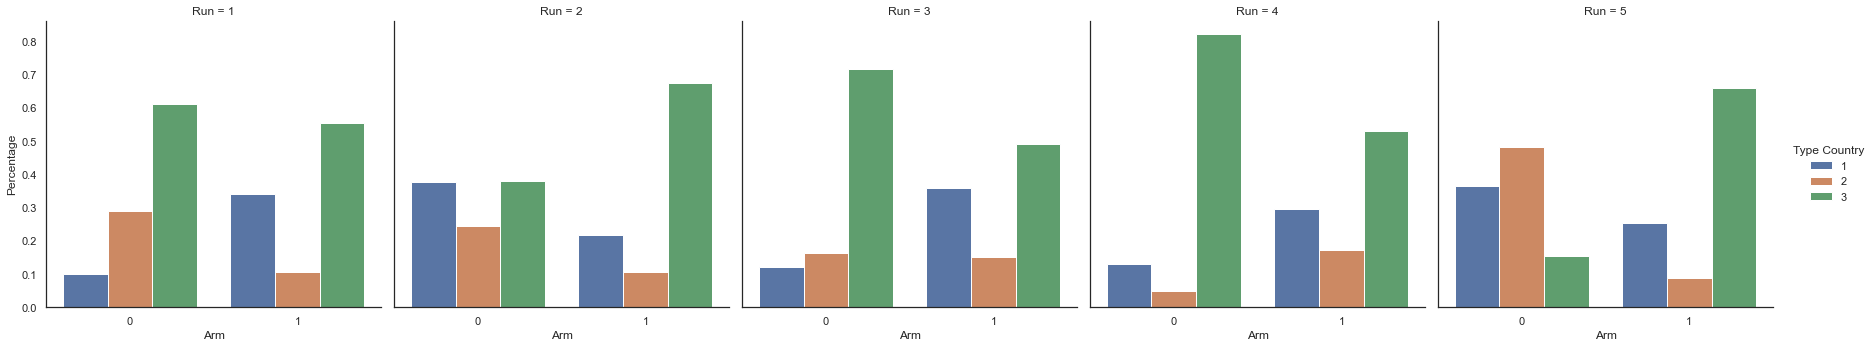

In [81]:
Country_5Runs(Feat_Best7_aux2)

### 4 Arms experiments

#### Day 1

In [82]:
Reward = "iap_revenue_d1"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 5

Results1_4, Paths_Best1_4, Aligns_Best1_4, Mean_Reward_Best1_4, Mean_RewardArms_Best1_4, Mark_Best1_4, Feat_Best1_4, Times_ArmChosen1_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

Score to beat: 0.01798449726936217
Parameters for following model:
	Reward: iap_revenue_d1
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 6 

EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 0.5


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [02:21<00:00, 986.42it/s]


	Algorithm result is: 0.0183868680629329
	Score to beat is: 0.01798449726936217
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 1


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [02:22<00:00, 981.09it/s]


	Algorithm result is: 0.01648744791847507
	Score to beat is: 0.01798449726936217
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 1.5


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [02:23<00:00, 974.69it/s]


	Algorithm result is: 0.020210913278812134
	Score to beat is: 0.01798449726936217
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 2


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [02:27<00:00, 951.94it/s]


	Algorithm result is: 0.017443605805736846
	Score to beat is: 0.01798449726936217
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 2.3581015157406195


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [02:24<00:00, 969.23it/s]


	Algorithm result is: 0.016645846266816974
	Score to beat is: 0.01798449726936217
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 2.480207187300798


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [02:24<00:00, 971.87it/s]


	Algorithm result is: 0.014698985801908593
	Score to beat is: 0.01798449726936217
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 3


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [02:20<00:00, 994.72it/s]


	Algorithm result is: 0.017537185479142355
	Score to beat is: 0.01798449726936217
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d1 RUNNING
Alpha equals: 3.5


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [02:28<00:00, 940.25it/s]

	Algorithm result is: 0.019400380842254667
	Score to beat is: 0.01798449726936217


In [83]:
Results1_4

[0.0183868680629329,
 0.01648744791847507,
 0.020210913278812134,
 0.017443605805736846,
 0.016645846266816974,
 0.014698985801908593,
 0.017537185479142355,
 0.019400380842254667]

In [84]:
print("Best alpha is:", Alphas[Results1_4.index(np.max(Results1_4))])
Alpha = Alphas[Results1_4.index(np.max(Results1_4))]

Best alpha is: 1.5


In [85]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

0.021240729210777565
0.017978109238545176


In [86]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best1_4))

Score to beat: 0.01798449726936217
Algorithm score: 0.020210913278812134


In [87]:
Mean_Reward_Best1_4

[0.022523431310112394,
 0.017327518605477165,
 0.025137787949105265,
 0.023355949257255752,
 0.012709879272110106]

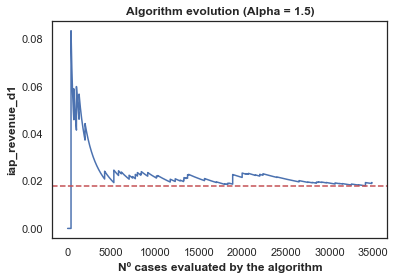

In [93]:
Plot_AlignRewards(Aligns_Best1_4, 0, Reward, Alpha, N = 140000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

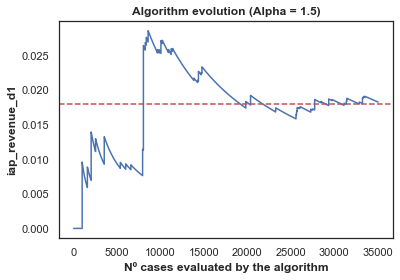

In [94]:
Plot_AlignRewards(Aligns_Best1_4, 1, Reward, Alpha, N = 140000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

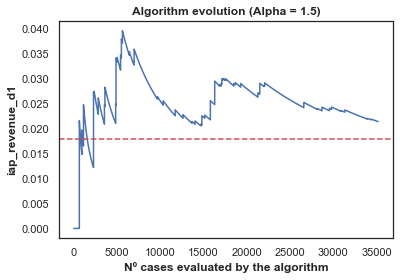

In [95]:
Plot_AlignRewards(Aligns_Best1_4, 2, Reward, Alpha, N = 140000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

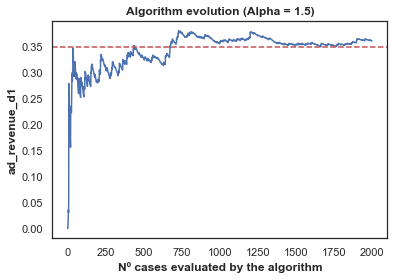

In [87]:
Plot_AlignRewards(Aligns_Best1_4, 4, Reward, Alpha, N = 2000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

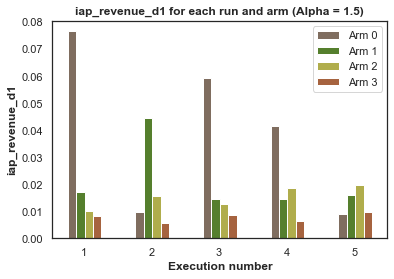

In [96]:
PerformanceArm4(Mean_RewardArms_Best1_4, Alpha, Reward)

In [97]:
Times_ArmChosen1_4

[[3613, 13637, 10027, 7579],
 [10617, 7866, 9108, 7463],
 [7180, 8413, 8965, 10640],
 [6874, 11068, 10515, 6607],
 [7244, 10820, 7861, 8930]]

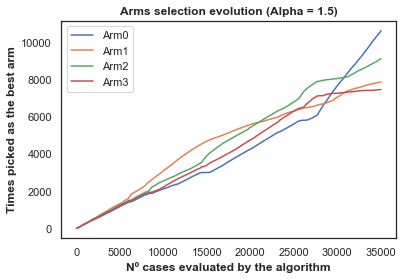

In [98]:
Plot_ArmsSelection(Paths_Best1_4, 1, Alpha)

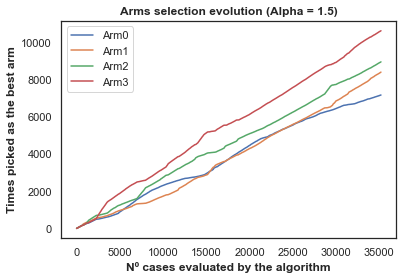

In [99]:
Plot_ArmsSelection(Paths_Best1_4, 2, Alpha)

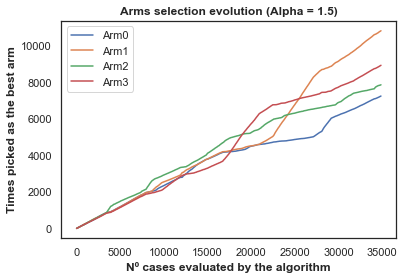

In [100]:
Plot_ArmsSelection(Paths_Best1_4, 4, Alpha)

Times each arm is chosen: [ 7105.6 10360.8  9295.2  8243.8]

Feature distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 50.458312311192
Proportion source_alias_source2 equals 0 for arm 1 is: 79.44763961791719
Proportion source_alias_source2 equals 0 for arm 2 is: 79.79626988754076
Proportion source_alias_source2 equals 0 for arm 3 is: 77.028715930934


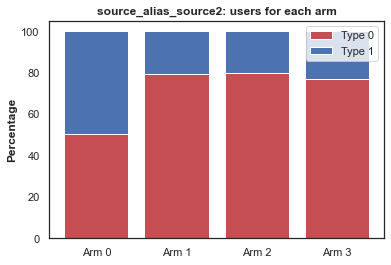

Feature distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 68.15076418053066
Proportion platform_alias_platform2 equals 0 for arm 1 is: 81.3496502742489
Proportion platform_alias_platform2 equals 0 for arm 2 is: 77.94707912000759
Proportion platform_alias_platform2 equals 0 for arm 3 is: 88.96168885752903


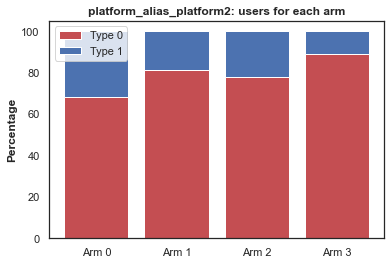

Feature distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.23247723 0.153588   0.61393478]
Proportion country for arm 1 is: [0.1443439  0.14138771 0.7142684 ]
Proportion country for arm 2 is: [0.09101756 0.10201666 0.80696579]
Proportion country for arm 3 is: [0.06624179 0.11977056 0.81398765]


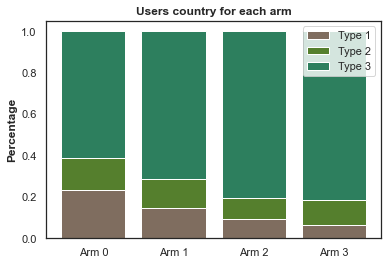

In [101]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen1_4, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best1_4, Feat_Best1_4)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best1_4, Feat_Best1_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best1_4, Feat_Best1_4)

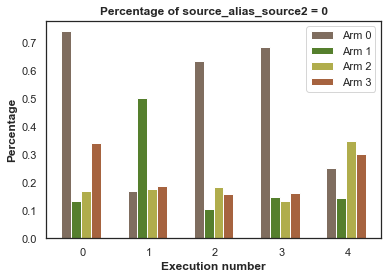

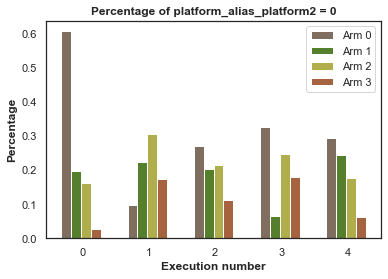

In [102]:
PlotFeaturesArm_4(Feat_Best1_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best1_4, Alpha, Reward = "platform_alias_platform2")

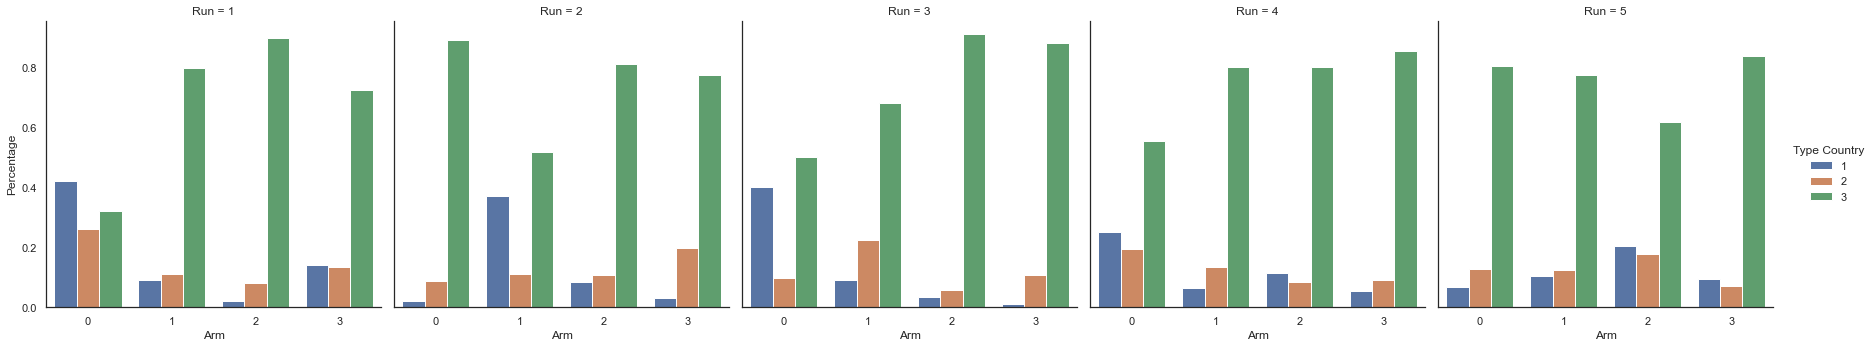

In [103]:
PlotFeaturesArm_4_Country5Runs(Feat_Best1_4)

#### Day 3

In [105]:
Reward = "iap_revenue_d3"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3]
Times = 4

Results3_4, Paths_Best3_4, Aligns_Best3_4, Mean_Reward_Best3_4, Mean_RewardArms_Best3_4, Mark_Best3_4, Feat_Best3_4, Times_ArmChosen3_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

Score to beat: 0.02737043511417082
Parameters for following model:
	Reward: iap_revenue_d3
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d3 RUNNING
Alpha equals: 0.5


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [07:54<00:00, 295.18it/s]


	Algorithm result is: 0.026206829519541085
	Score to beat is: 0.02737043511417082
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d3 RUNNING
Alpha equals: 1


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [07:31<00:00, 309.96it/s]


	Algorithm result is: 0.023763257946936605
	Score to beat is: 0.02737043511417082
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d3 RUNNING
Alpha equals: 1.5


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [07:34<00:00, 308.32it/s]


	Algorithm result is: 0.02538301086347696
	Score to beat is: 0.02737043511417082
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d3 RUNNING
Alpha equals: 2


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [07:46<00:00, 300.04it/s]


	Algorithm result is: 0.028869372816511245
	Score to beat is: 0.02737043511417082
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d3 RUNNING
Alpha equals: 2.3581015157406195


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [07:38<00:00, 305.12it/s]


	Algorithm result is: 0.02836440544476012
	Score to beat is: 0.02737043511417082
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d3 RUNNING
Alpha equals: 2.480207187300798


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [07:46<00:00, 300.23it/s]


	Algorithm result is: 0.023979910393444413
	Score to beat is: 0.02737043511417082
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d3 RUNNING
Alpha equals: 3


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [07:52<00:00, 296.04it/s]


	Algorithm result is: 0.026029330405345913
	Score to beat is: 0.02737043511417082


In [106]:
Results3_4

[0.026206829519541085,
 0.023763257946936605,
 0.02538301086347696,
 0.028869372816511245,
 0.02836440544476012,
 0.023979910393444413,
 0.026029330405345913]

In [107]:
print("Best alpha is:", Alphas[Results3_4.index(np.max(Results3_4))])
Alpha = Alphas[Results3_4.index(np.max(Results3_4))]

Best alpha is: 2


In [108]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

0.03289739784637691
0.025971272402333028


In [109]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best3_4))

Score to beat: 0.02737043511417082
Algorithm score: 0.028869372816511245


In [110]:
Mean_Reward_Best3_4

[0.021381269474884414,
 0.02636116759260415,
 0.04256295286582299,
 0.02517210133273342]

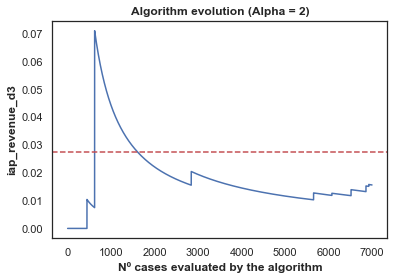

In [111]:
Plot_AlignRewards(Aligns_Best3_4, 0, Reward, Alpha, N = 7000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

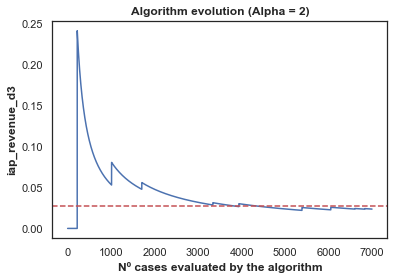

In [112]:
Plot_AlignRewards(Aligns_Best3_4, 1, Reward, Alpha, N = 7000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

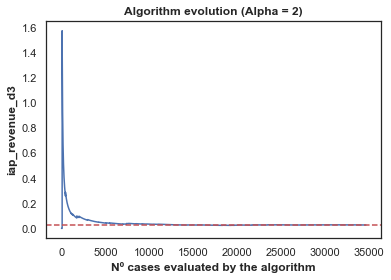

In [114]:
Plot_AlignRewards(Aligns_Best3_4, 2, Reward, Alpha, N = 50000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

In [115]:
Times_ArmChosen3_4

[[7881, 8574, 9890, 8858],
 [6976, 9744, 9613, 9058],
 [8666, 9480, 8337, 8160],
 [9720, 8200, 10289, 6801]]

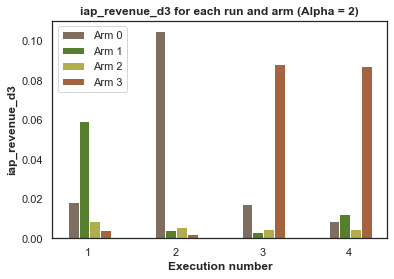

In [116]:
PerformanceArm4(Mean_RewardArms_Best3_4, Alpha, Reward)

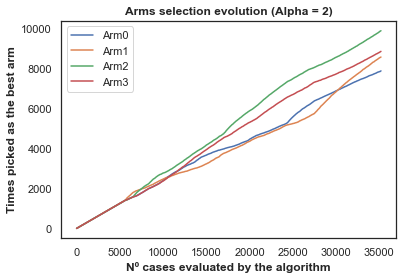

In [117]:
Plot_ArmsSelection(Paths_Best3_4, 0, Alpha)

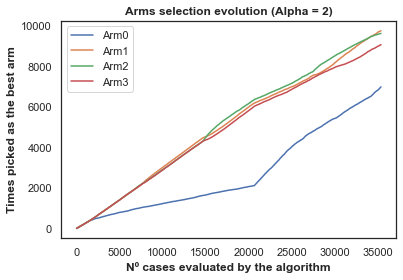

In [118]:
Plot_ArmsSelection(Paths_Best3_4, 1, Alpha)

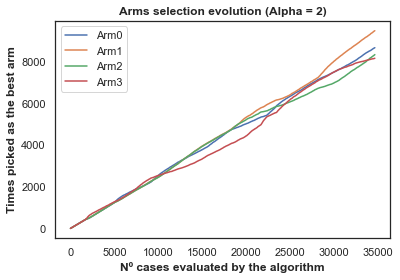

In [119]:
Plot_ArmsSelection(Paths_Best3_4, 2, Alpha)

Times each arm is chosen: [8310.75 8999.5  9532.25 8219.25]

Feature distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 82.46965156654628
Proportion source_alias_source2 equals 0 for arm 1 is: 70.8725856697549
Proportion source_alias_source2 equals 0 for arm 2 is: 79.35161441531329
Proportion source_alias_source2 equals 0 for arm 3 is: 64.99376858721347


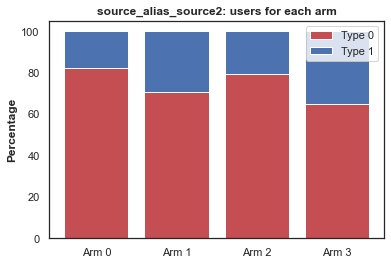

Feature distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 86.77367737579424
Proportion platform_alias_platform2 equals 0 for arm 1 is: 82.41031937826365
Proportion platform_alias_platform2 equals 0 for arm 2 is: 75.03184926694763
Proportion platform_alias_platform2 equals 0 for arm 3 is: 79.81580726438322


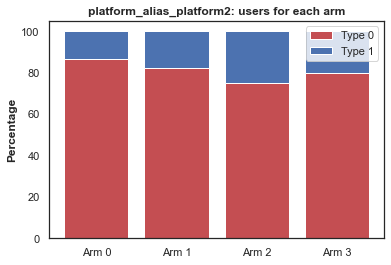

Feature distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.10779659 0.12671479 0.76548862]
Proportion country for arm 1 is: [0.13180454 0.13088165 0.73731381]
Proportion country for arm 2 is: [0.09782752 0.13166797 0.77050451]
Proportion country for arm 3 is: [0.12868339 0.09300239 0.77831422]


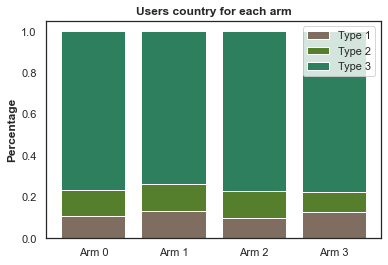

In [120]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen3_4, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best3_4, Feat_Best3_4)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best3_4, Feat_Best3_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best3_4, Feat_Best3_4)

In [121]:
printFeatures2(Mark_Best3_4, Feat_Best3_4, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 89.22034076257808
Proportion country_alias_country_group1 equals 0 for arm 1 is: 86.8195456621901
Proportion country_alias_country_group1 equals 0 for arm 2 is: 90.21724762754934
Proportion country_alias_country_group1 equals 0 for arm 3 is: 87.13166086689694

Proportion country_alias_country_group2 equals 0 for arm 0 is: 87.3285211973629
Proportion country_alias_country_group2 equals 0 for arm 1 is: 86.91183508473148
Proportion country_alias_country_group2 equals 0 for arm 2 is: 86.83320307624258
Proportion country_alias_country_group2 equals 0 for arm 3 is: 90.69976137575082

Proportion country_alias_country_group3 equals 0 for arm 0 is: 23.451138040059018
Proportion country_alias_country_group3 equals 0 for arm 1 is: 26.268619253078413
Proportion country_alias_country_group3 equals 0 for arm 2 is: 22.949549296208083
Proportion country_alias_country_group3 equals 0 for arm 3 is: 22.16857775735224

Proportion platform_alia

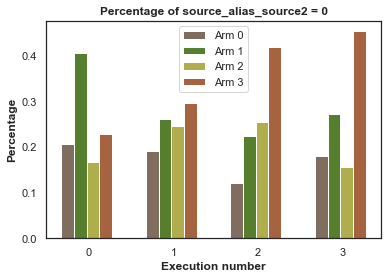

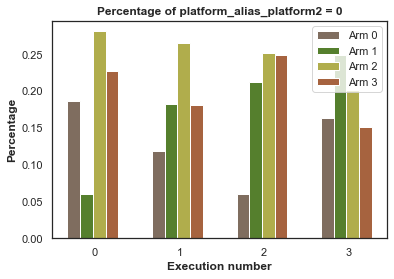

In [122]:
PlotFeaturesArm_4(Feat_Best3_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best3_4, Alpha, Reward = "platform_alias_platform2")

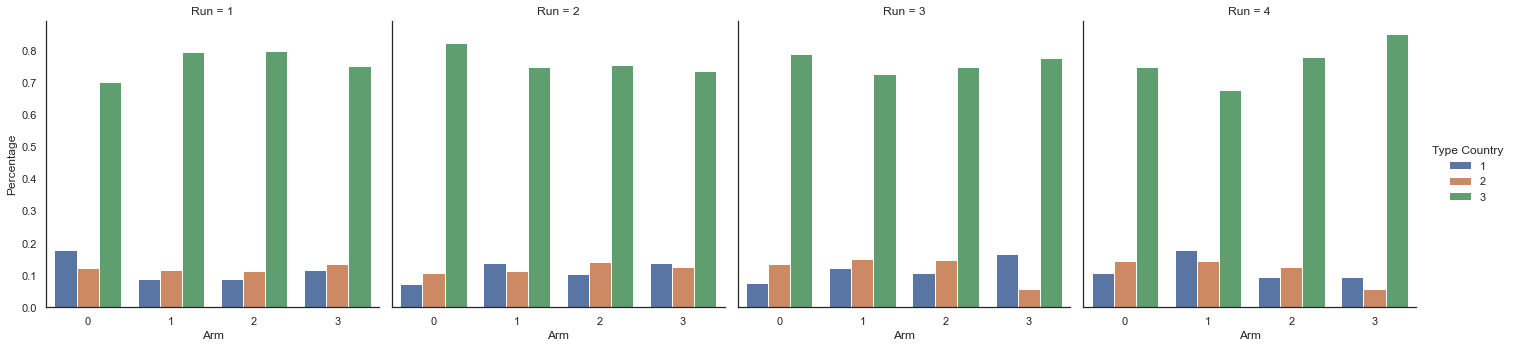

In [124]:
PlotFeaturesArm_4_Country4Runs(Feat_Best3_4)

#### Day 7

In [125]:
Reward = "iap_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1",
            "return_d3", "time_played_d3", "ad_revenue_d3", "iap_revenue_d3", "num_sessions_d3"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3]
Times = 4

Results7_4, Paths_Best7_4, Aligns_Best7_4, Mean_Reward_Best7_4, Mean_RewardArms_Best7_4, Mark_Best7_4, Feat_Best7_4, Times_ArmChosen7_4 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

Score to beat: 0.040262696383544426
Parameters for following model:
	Reward: iap_revenue_d7
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3]
	Num of Features: 16 

EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 0.5


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [13:05<00:00, 178.16it/s]


	Algorithm result is: 0.04376421175706202
	Score to beat is: 0.040262696383544426
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 1


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [13:19<00:00, 175.04it/s]


	Algorithm result is: 0.03621156085147587
	Score to beat is: 0.040262696383544426
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 1.5


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [12:58<00:00, 179.92it/s]


	Algorithm result is: 0.03675461401326886
	Score to beat is: 0.040262696383544426
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 2


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [12:50<00:00, 181.72it/s]


	Algorithm result is: 0.041578918454264195
	Score to beat is: 0.040262696383544426
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 2.3581015157406195


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [13:05<00:00, 178.16it/s]


	Algorithm result is: 0.041380121540668606
	Score to beat is: 0.040262696383544426
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 2.480207187300798


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [13:01<00:00, 179.21it/s]


	Algorithm result is: 0.03767538359806518
	Score to beat is: 0.040262696383544426
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 3


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [13:06<00:00, 177.93it/s]

	Algorithm result is: 0.03751099020248504
	Score to beat is: 0.040262696383544426


In [126]:
Results7_4

[0.04376421175706202,
 0.03621156085147587,
 0.03675461401326886,
 0.041578918454264195,
 0.041380121540668606,
 0.03767538359806518,
 0.03751099020248504]

In [127]:
print("Best alpha is:", Alphas[Results7_4.index(np.max(Results7_4))])
Alpha = Alphas[Results7_4.index(np.max(Results7_4))]

Best alpha is: 0.5


In [128]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

0.041623712149734385
0.039361072319625455


In [129]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7_4))

Score to beat: 0.040262696383544426
Algorithm score: 0.04376421175706202


In [130]:
Mean_Reward_Best7_4

[0.03739842211561776,
 0.044661183664206454,
 0.03999734572116979,
 0.05299989552725409]

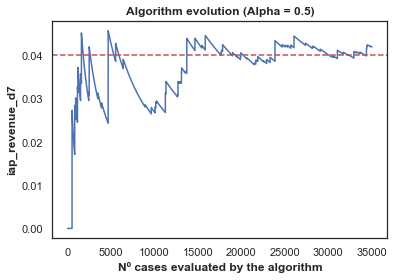

In [132]:
Plot_AlignRewards(Aligns_Best7_4, 0, Reward, Alpha, N = 100000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

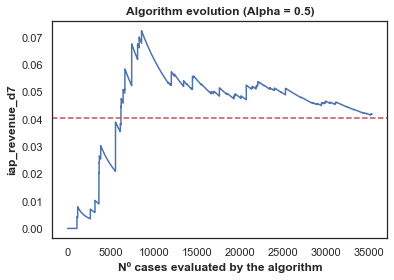

In [133]:
Plot_AlignRewards(Aligns_Best7_4, 1, Reward, Alpha, N = 100000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

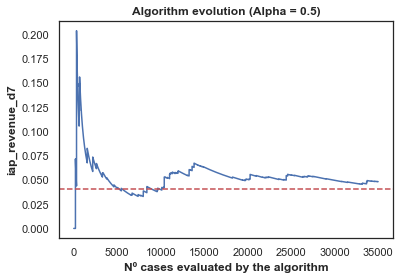

In [134]:
Plot_AlignRewards(Aligns_Best7_4, 3, Reward, Alpha, N = 100000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

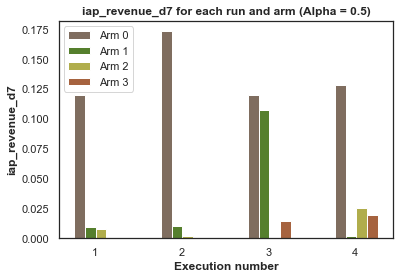

In [135]:
PerformanceArm4(Mean_RewardArms_Best7_4, Alpha, Reward)

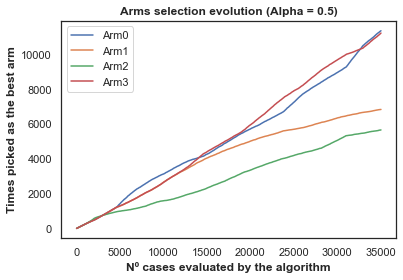

In [136]:
Plot_ArmsSelection(Paths_Best7_4, 0, Alpha)

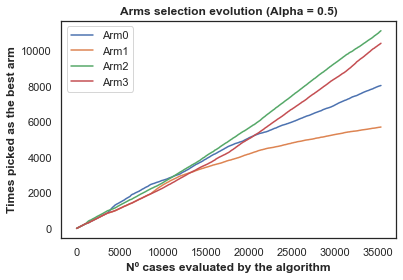

In [137]:
Plot_ArmsSelection(Paths_Best7_4, 1, Alpha)

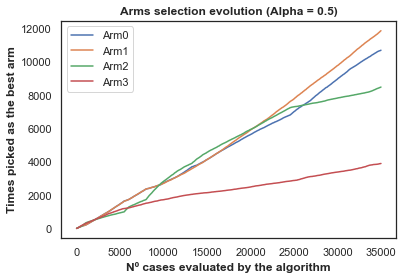

In [138]:
Plot_ArmsSelection(Paths_Best7_4, 3, Alpha)

Times each arm is chosen: [ 9308.    6736.75 10576.25  8505.5 ]

Feature distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 71.77967720704342
Proportion source_alias_source2 equals 0 for arm 1 is: 84.55758410065542
Proportion source_alias_source2 equals 0 for arm 2 is: 77.40400886241477
Proportion source_alias_source2 equals 0 for arm 3 is: 52.152169085864884


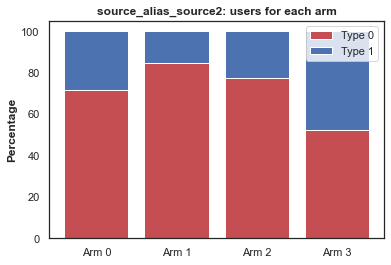

Feature distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 74.15271152574927
Proportion platform_alias_platform2 equals 0 for arm 1 is: 66.68715246109802
Proportion platform_alias_platform2 equals 0 for arm 2 is: 85.31132118308469
Proportion platform_alias_platform2 equals 0 for arm 3 is: 89.26759318052551


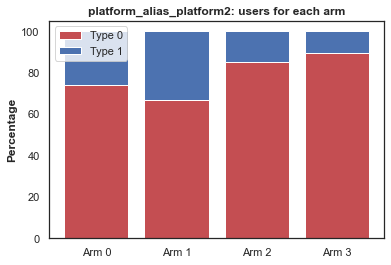

Feature distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.09951466 0.10228734 0.798198  ]
Proportion country for arm 1 is: [0.10360923 0.27421252 0.62217825]
Proportion country for arm 2 is: [0.11374675 0.11808952 0.76816373]
Proportion country for arm 3 is: [0.18975777 0.08975163 0.7204906 ]


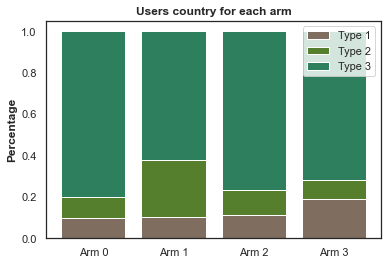

In [139]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7_4, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7_4, Feat_Best7_4)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7_4, Feat_Best7_4)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7_4, Feat_Best7_4)

In [140]:
printFeatures2(Mark_Best7_4, Feat_Best7_4, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 90.0485336087484
Proportion country_alias_country_group1 equals 0 for arm 1 is: 89.63907705568826
Proportion country_alias_country_group1 equals 0 for arm 2 is: 88.62532477444185
Proportion country_alias_country_group1 equals 0 for arm 3 is: 81.02422297273017

Proportion country_alias_country_group2 equals 0 for arm 0 is: 89.7712659553796
Proportion country_alias_country_group2 equals 0 for arm 1 is: 72.57874837912236
Proportion country_alias_country_group2 equals 0 for arm 2 is: 88.19104773950053
Proportion country_alias_country_group2 equals 0 for arm 3 is: 91.02483685197053

Proportion country_alias_country_group3 equals 0 for arm 0 is: 20.18020043587199
Proportion country_alias_country_group3 equals 0 for arm 1 is: 37.78217456518939
Proportion country_alias_country_group3 equals 0 for arm 2 is: 23.183627486057613
Proportion country_alias_country_group3 equals 0 for arm 3 is: 27.950940175299298

Proportion platform_alias

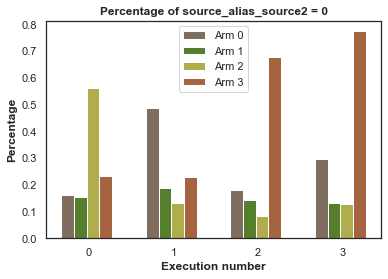

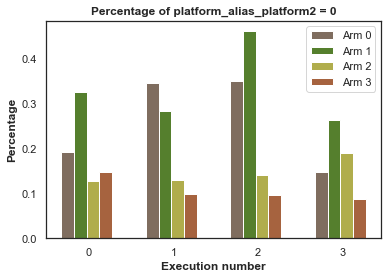

In [141]:
PlotFeaturesArm_4(Feat_Best7_4, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best7_4, Alpha, Reward = "platform_alias_platform2")

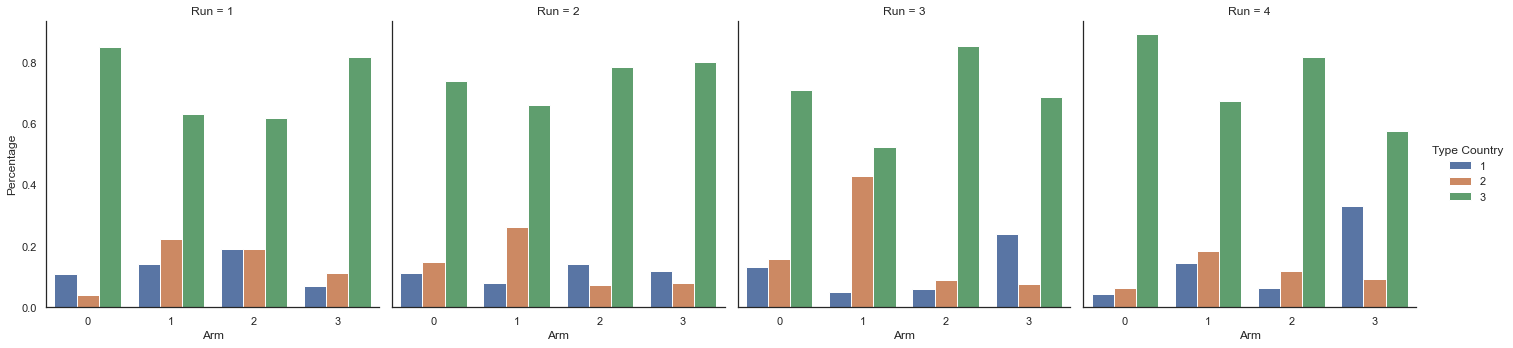

In [143]:
PlotFeaturesArm_4_Country4Runs(Feat_Best7_4)

#### Test removing features

In [144]:
Reward = "iap_revenue_d7"
Features = ["country_alias_country_group1","country_alias_country_group2", "country_alias_country_group3",
            "platform_alias_platform2", "source_alias_source2", "NGU",
            "return_d1", "time_played_d1", "ad_revenue_d1", "iap_revenue_d1", "num_sessions_d1"]
Alphas = [0.5, 1, 1.5, 2, 1 + np.sqrt(np.log(2/0.05)/2), 1 + np.sqrt(np.log(2/0.025)/2), 3, 3.5]
Times = 4

Results7_4_aux3, Paths_Best7_4_aux3, Aligns_Best7_4_aux3, Mean_Reward_Best7_4_aux3, Mean_RewardArms_Best7_4_aux3, Mark_Best7_4_aux3, Feat_Best7_4_aux3, Times_ArmChosen7_4_aux3 = ExperimentAlphas(Actual_Dataset2, Reward, Features, Alphas, Times)

Score to beat: 0.040262696383544426
Parameters for following model:
	Reward: iap_revenue_d7
	Number of Arms: 4
	Alphas:  [0.5, 1, 1.5, 2, 2.3581015157406195, 2.480207187300798, 3, 3.5]
	Num of Features: 11 

EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 0.5


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [07:35<00:00, 307.16it/s]


	Algorithm result is: 0.03914892947417435
	Score to beat is: 0.040262696383544426
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 1


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [07:46<00:00, 300.41it/s]


	Algorithm result is: 0.03829765081478814
	Score to beat is: 0.040262696383544426
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 1.5


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [07:40<00:00, 303.75it/s]


	Algorithm result is: 0.03937921697800177
	Score to beat is: 0.040262696383544426
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 2


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [07:33<00:00, 308.37it/s]


	Algorithm result is: 0.042638409292266644
	Score to beat is: 0.040262696383544426
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 2.3581015157406195


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [07:23<00:00, 315.33it/s]


	Algorithm result is: 0.02945379121555207
	Score to beat is: 0.040262696383544426
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 2.480207187300798


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [08:13<00:00, 283.55it/s]


	Algorithm result is: 0.03881142682837935
	Score to beat is: 0.040262696383544426
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 3


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [08:20<00:00, 279.59it/s]


	Algorithm result is: 0.038708181496299426
	Score to beat is: 0.040262696383544426
EVALUATION WITH DIFFERENT ALPHAS FOR iap_revenue_d7 RUNNING
Alpha equals: 3.5


100%|█████████████████████████████████████████████████████████████████████████| 140000/140000 [07:35<00:00, 307.54it/s]

	Algorithm result is: 0.030478066442122184
	Score to beat is: 0.040262696383544426


No better results when removing d3 features.

In [145]:
Results7_4_aux3

[0.03914892947417435,
 0.03829765081478814,
 0.03937921697800177,
 0.042638409292266644,
 0.02945379121555207,
 0.03881142682837935,
 0.038708181496299426,
 0.030478066442122184]

In [147]:
print("Best alpha is:", Alphas[Results7_4_aux3.index(np.max(Results7_4_aux3))])
Alpha = Alphas[Results7_4_aux3.index(np.max(Results7_4_aux3))]

Best alpha is: 2


In [148]:
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==0][Reward]))
print(np.mean(Actual_Dataset2[Actual_Dataset2["ab_test_experience_id"]==1][Reward]))

0.041623712149734385
0.039361072319625455


In [149]:
print("Score to beat:", np.mean(Actual_Dataset2[Reward]))
print("Algorithm score:", np.mean(Mean_Reward_Best7_4_aux3))

Score to beat: 0.040262696383544426
Algorithm score: 0.042638409292266644


In [130]:
Mean_Reward_Best7_4_aux3

[0.03739842211561776,
 0.044661183664206454,
 0.03999734572116979,
 0.05299989552725409]

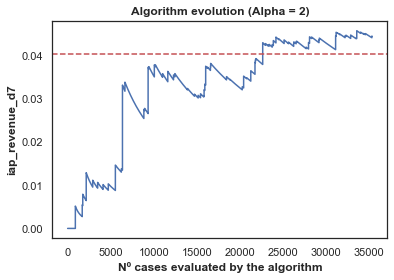

In [150]:
Plot_AlignRewards(Aligns_Best7_4_aux3, 0, Reward, Alpha, N = 100000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

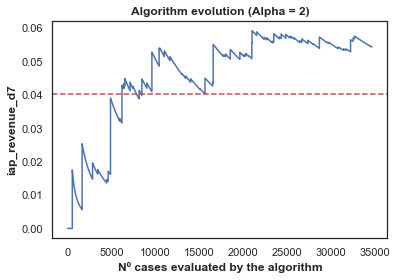

In [155]:
Plot_AlignRewards(Aligns_Best7_4_aux3, 1, Reward, Alpha, N = 100000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

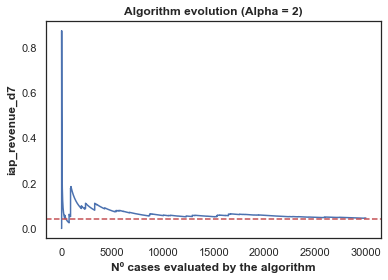

In [154]:
Plot_AlignRewards(Aligns_Best7_4_aux3, 3, Reward, Alpha, N = 30000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

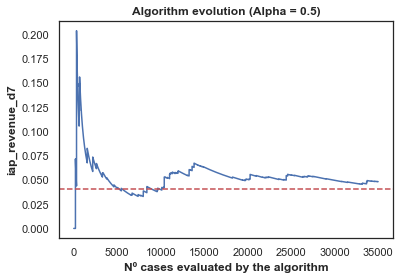

In [134]:
Plot_AlignRewards(Aligns_Best7_4, 3, Reward, Alpha, N = 100000)
plt.axhline(y=np.mean(Actual_Dataset2[Reward]), color='r', linestyle='--')

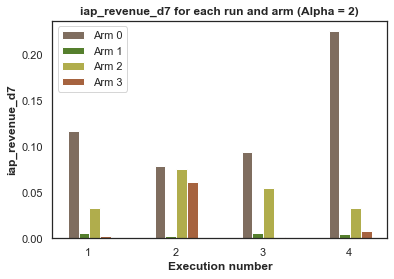

In [156]:
PerformanceArm4(Mean_RewardArms_Best7_4_aux3, Alpha, Reward)

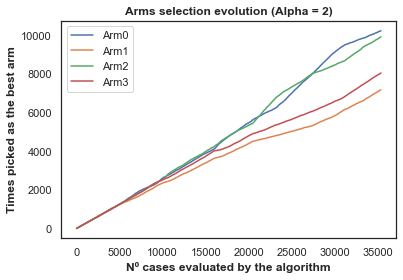

In [158]:
Plot_ArmsSelection(Paths_Best7_4_aux3, 0, Alpha)

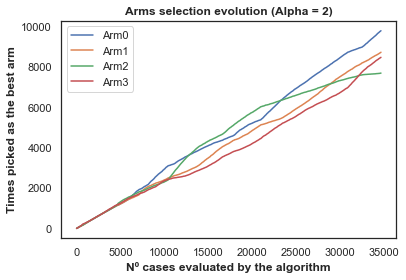

In [159]:
Plot_ArmsSelection(Paths_Best7_4_aux3, 1, Alpha)

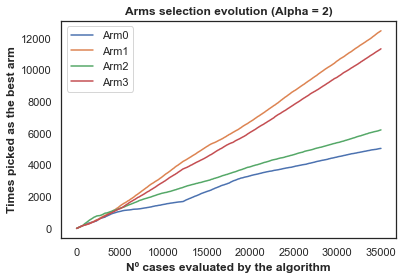

In [160]:
Plot_ArmsSelection(Paths_Best7_4_aux3, 3, Alpha)

Times each arm is chosen: [9079.25 9095.75 7650.75 9181.  ]

Feature distribution:
source1    0.749795
source2    0.250205
Name: source_alias, dtype: float64

Proportion source_alias_source2 equals 0 for arm 0 is: 77.82246780060736
Proportion source_alias_source2 equals 0 for arm 1 is: 72.12165569027381
Proportion source_alias_source2 equals 0 for arm 2 is: 84.55629004836521
Proportion source_alias_source2 equals 0 for arm 3 is: 64.96301241299648


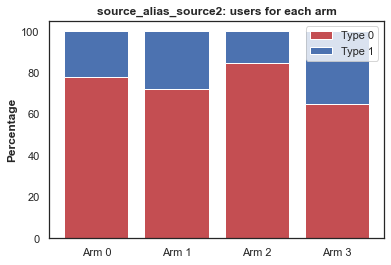

Feature distribution:
platform1    0.807989
platform2    0.192011
Name: platform_alias, dtype: float64

Proportion platform_alias_platform2 equals 0 for arm 0 is: 86.69100058322043
Proportion platform_alias_platform2 equals 0 for arm 1 is: 80.48391664623902
Proportion platform_alias_platform2 equals 0 for arm 2 is: 82.9287563926771
Proportion platform_alias_platform2 equals 0 for arm 3 is: 74.57319980211763


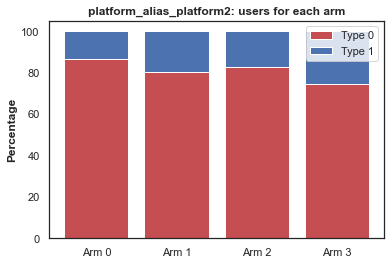

Feature distribution:
country_group3    0.762248
country_group2    0.120774
country_group1    0.116978
Name: country_alias, dtype: float64

Proportion country for arm 0 is: [0.05869726 0.09476398 0.84653876]
Proportion country for arm 1 is: [0.13246167 0.13045632 0.737082  ]
Proportion country for arm 2 is: [0.11494399 0.12319572 0.76186029]
Proportion country for arm 3 is: [0.14566963 0.14526339 0.70906699]


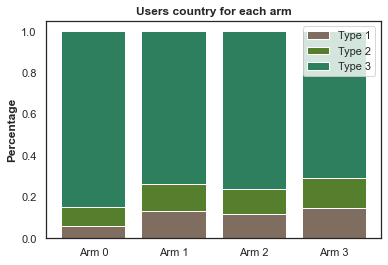

In [161]:
print("Times each arm is chosen:", np.mean(Times_ArmChosen7_4_aux3, axis = 0))
print("")
print("Feature distribution:")
print(DataDef2["source_alias"].value_counts(normalize=True))
print("")
Plot1("source_alias_source2", Mark_Best7_4_aux3, Feat_Best7_4_aux3)
print("Feature distribution:")
print(DataDef2["platform_alias"].value_counts(normalize=True))
print("")
Plot1("platform_alias_platform2", Mark_Best7_4_aux3, Feat_Best7_4_aux3)
print("Feature distribution:")
print(DataDef2["country_alias"].value_counts(normalize=True))
print("")
Plot2_2arms(Mark_Best7_4_aux3, Feat_Best7_4_aux3)

In [162]:
printFeatures2(Mark_Best7_4_aux3, Feat_Best7_4_aux3, Features)

Proportion country_alias_country_group1 equals 0 for arm 0 is: 94.13027378551814
Proportion country_alias_country_group1 equals 0 for arm 1 is: 86.75383265314316
Proportion country_alias_country_group1 equals 0 for arm 2 is: 88.50560082465333
Proportion country_alias_country_group1 equals 0 for arm 3 is: 85.43303727722956

Proportion country_alias_country_group2 equals 0 for arm 0 is: 90.52360244111657
Proportion country_alias_country_group2 equals 0 for arm 1 is: 86.95436756882941
Proportion country_alias_country_group2 equals 0 for arm 2 is: 87.68042770165582
Proportion country_alias_country_group2 equals 0 for arm 3 is: 85.47366126761185

Proportion country_alias_country_group3 equals 0 for arm 0 is: 15.346123773365278
Proportion country_alias_country_group3 equals 0 for arm 1 is: 26.291799778027436
Proportion country_alias_country_group3 equals 0 for arm 2 is: 23.813971473690845
Proportion country_alias_country_group3 equals 0 for arm 3 is: 29.093301455158592

Proportion platform_a

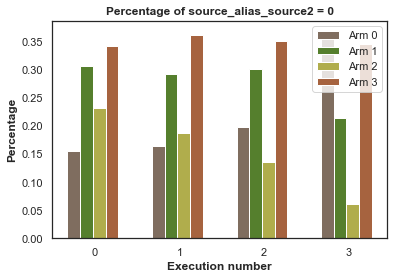

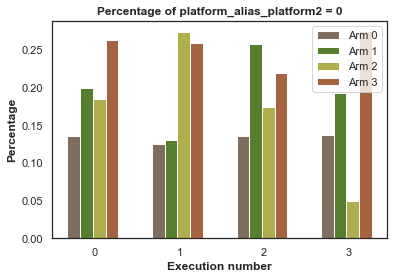

In [163]:
PlotFeaturesArm_4(Feat_Best7_4_aux3, Alpha, Reward = "source_alias_source2")
PlotFeaturesArm_4(Feat_Best7_4_aux3, Alpha, Reward = "platform_alias_platform2")

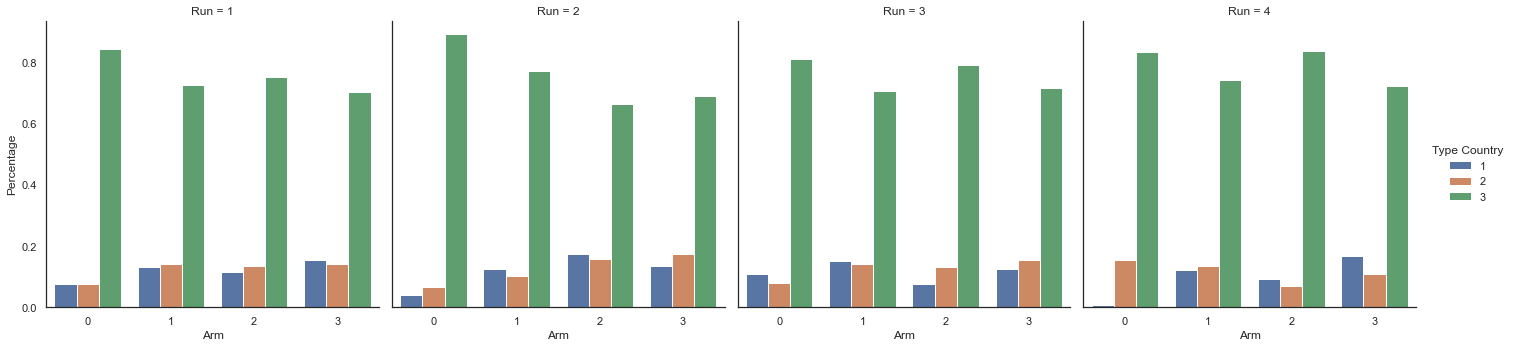

In [164]:
PlotFeaturesArm_4_Country4Runs(Feat_Best7_4_aux3)